<a href="https://colab.research.google.com/github/jiaweili176/LIJIAWIE66/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

数据 [[52, 42]] 的分类结果: Jindo dog
最近5个邻居的距离: [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]]
最近5个邻居的索引: [[ 6 14 12 10  8]]


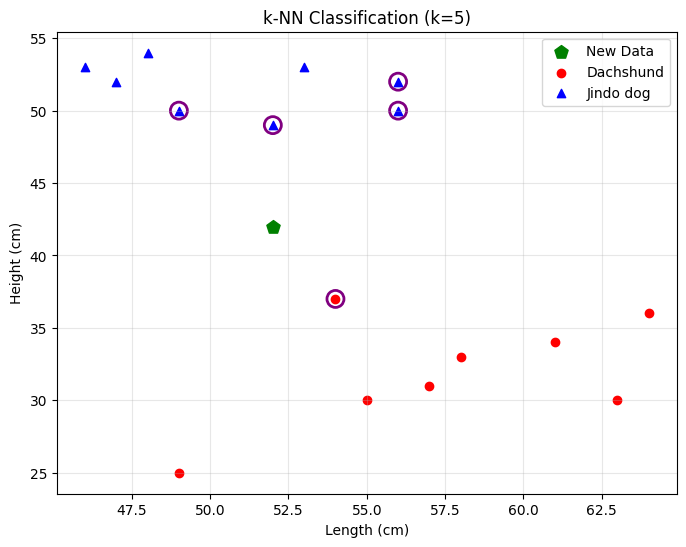

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 腊肠犬的长度和高度数据
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

# 珍岛犬的长度和高度数据
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

# 数据处理
j_data = np.column_stack((jin_length, jin_height))  # 珍岛犬数据组合
j_label = np.ones(len(j_data))  # 珍岛犬标签设为1

d_data = np.column_stack((dach_length, dach_height))  # 腊肠犬数据组合
d_label = np.zeros(len(d_data))  # 腊肠犬犬标签设为0

# 合并数据集和标签
dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

# 定义新数据点（待分类的犬只数据）
newdata = [[52, 42]]
dog_classes = {0: 'Dachshund', 1: 'Jindo dog'}  # 标签与犬种对应关系

# 设置k值并创建kNN分类器
k = 5  # 可以尝试改为9观察结果变化
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)  # 训练模型

# 预测新数据
y_pred = knn.predict(newdata)
print(f'数据 {newdata} 的分类结果: {dog_classes[y_pred[0]]}')

# 获取最近邻的距离和索引
distances, indexes = knn.kneighbors(newdata)
print(f'最近{k}个邻居的距离: {distances}')
print(f'最近{k}个邻居的索引: {indexes}')

# 可视化最近邻的函数
def draw_neighbor(dogs, indexes, k):
    """标记出最近的k个邻居点"""
    for i in range(k):
        neighbor = dogs[indexes[0][i]]
        # 用紫色色空心圆标记最近邻点
        plt.scatter(neighbor[0], neighbor[1], s=150, facecolors='none',
                   edgecolors='purple', linewidth=2)

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(newdata[0][0], newdata[0][1], s=100, marker='p', c='green', label='New Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height, c='blue', marker='^', label='Jindo dog')

# 标记最近邻点
draw_neighbor(dogs, indexes, k)

# 设置图表属性
plt.xlabel('Length (cm)')
plt.ylabel('Height (cm)')
plt.title(f'k-NN Classification (k={k})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()